In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("karnataka_house_prices.csv")

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.shape

(13320, 9)

In [7]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

# Feature Selection

## Dropping features like society, balcony which are not relevant to the model for prediction

In [8]:
df1=df.drop(["area_type","availability","society","balcony"],axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning

## Removing missing values from the data-frame

### Checking for missing values

In [9]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

### We found some missing values, hence we drop those rows.

In [10]:
df2=df1.dropna().copy()
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### Checking the shape of the dataset after removal

In [11]:
df2.shape

(13246, 5)

# Feature Engineering

## Currently, 'size' contains the BHK count as a string, which the model cannot understand, so adding a new column i.e. bhk which contains the correspoding integer value.

In [12]:
def extract_bhk_value(x):
    return x.split(' ')[0]

df2["bhk"]=df2["size"].apply(extract_bhk_value)
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


## Checking unique values for 'total_sqft'

In [13]:
df2["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

### Ex: for the row 30, it's a range

In [14]:
df2.iloc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                     4
Name: 30, dtype: object

## The 'total_sqft' column does not have consistent values. There are ranges in some and some have units appended to them. Therefore, averaging out the ranges and removed the ones with units..

In [15]:
def fix_total_sqft(x):
    # it's a range
    if type(x)== str and x.__contains__('-'):
        split_data=x.split('-')
        if(len(split_data)==2):
            # average out the range
            return (float(split_data[0]) + float(split_data[1]))/2

    # try parsing it as a float        
    try:
       return float(x)
    except:
        return None

df2["total_sqft"] = df2["total_sqft"].apply(fix_total_sqft)
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [16]:
df2.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [17]:
# removing na values
df2=df2[~df2.total_sqft.isna()]
df2.shape

(13200, 6)

# Feature Engineering

## Adding a feature named 'price_per_sqft' representing price per square feet.

In [18]:
df3=df2.copy()
df3["price_per_sqft"]=df3["price"]*100000 / df3["total_sqft"]
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## Analyzing 'location' column

In [19]:
locations = df3['location'].value_counts()
locations

Whitefield                 532
Sarjapur  Road             392
Electronic City            302
Kanakpura Road             264
Thanisandra                232
                          ... 
Anathanagar                  1
Nagarbhavi  BDA Complex      1
Pillanna Gardens             1
Defence Layout               1
Pillahalli                   1
Name: location, Length: 1298, dtype: int64

## We have a lot of locations which are being used less than 10 times, hence, categorizing them as 'other' will help reduce the number of unique categories as later on we'll be encoding the labels.

In [20]:
locations_less_than_10 = locations[locations<=10]
print(f'Categorizing {len(locations_less_than_10)} columns as "other" while {len(locations[locations>10])} remain the same')

Categorizing 1058 columns as "other" while 240 remain the same


In [21]:
def handle_location(x):
    return "other" if x in locations_less_than_10 else x

df3['location']=df3['location'].apply(handle_location)
df3['location'].value_counts()

other                        2887
Whitefield                    532
Sarjapur  Road                392
Electronic City               302
Kanakpura Road                264
                             ... 
HAL 2nd Stage                  11
Kodigehalli                    11
Tindlu                         11
2nd Phase Judicial Layout      11
Nehru Nagar                    11
Name: location, Length: 241, dtype: int64

# Removing outliers

## Assuming a square foot per bedroom of 300, a two-bedroom apartment must be at least 600 square feet, a 500 square foot apartment with two bedrooms is strange and should be eliminated as an anomaly. We'll retain our minimal thresold per bhk at 300 sqft to exclude such outliers.

In [22]:
df3.describe()

,total_sqft,bath,price,price_per_sqft
count,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,7.920759e+03
std,1237.323445,1.338915,149.175995,1.067272e+05
min,1.000000,1.000000,8.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,4.267701e+03
50%,1275.000000,2.000000,71.850000,5.438331e+03
75%,1672.000000,3.000000,120.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,1.200000e+07


In [23]:
df4=df3[~(df3['total_sqft']/df3['bhk'].astype(float)<300)]
df4.describe()

,total_sqft,bath,price,price_per_sqft
count,12456.000000,12456.000000,12456.000000,12456.000000
mean,1590.189927,2.562781,111.187960,6308.502826
std,1260.404795,1.080275,152.203367,4168.127339
min,300.000000,1.000000,9.000000,267.829813
25%,1115.000000,2.000000,49.000000,4210.526316
50%,1300.000000,2.000000,70.000000,5294.117647
75%,1700.000000,3.000000,115.000000,6916.666667
max,52272.000000,16.000000,3600.000000,176470.588235


In [24]:
df4.shape

(12456, 7)

In [25]:
import numpy as np

In [26]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for _, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df5 = remove_pps_outliers(df4)
df5.shape

(10245, 7)

# Visualizing data

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

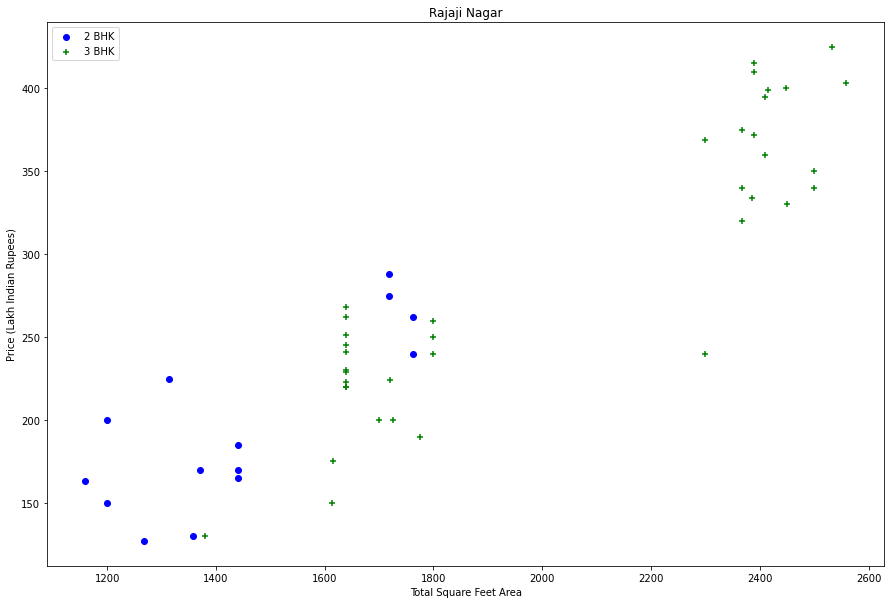

In [28]:
def plot_location(df,location):
    bhk2 = df[(df.location==location) & (df.bhk.astype(int)==2)]
    bhk3 = df[(df.location==location) & (df.bhk.astype(int)==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK')
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_location(df5,"Rajaji Nagar")

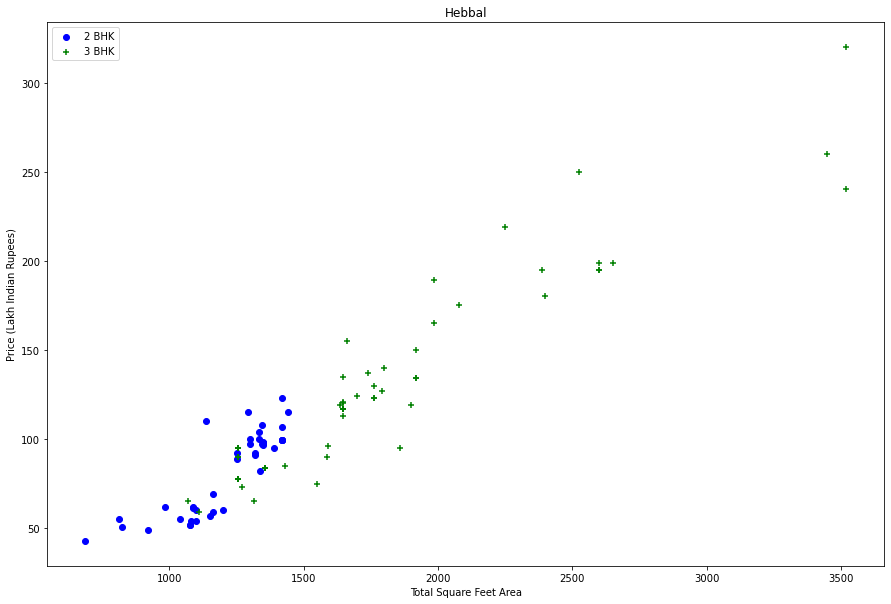

In [29]:
plot_location(df5,"Hebbal")

In [30]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    
    for _, location_df in df.groupby("location"): # for each location
        bhk_stats={}
        
        for bhk, bhk_df in location_df.groupby("bhk"): # for each bhk in a location
            bhk_stats[int(bhk)]={
                "mean" : np.mean(bhk_df["price_per_sqft"]),
                "count" : bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats=bhk_stats.get(int(bhk)-1)
            if stats and stats["count"] > 5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df["price_per_sqft"] < stats["mean"]].index.values)
    
    return df.drop(index=exclude_indices)

df6=remove_bhk_outliers(df5)
df6.shape

(7331, 7)

In [31]:
df6['bhk']=df6['bhk'].astype(float)
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2.0,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2.0,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2.0,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3.0,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2.0,4540.654699


## Outlier Removal Using Bathrooms Feature

### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [32]:
df6[df6["bhk"]+2 < df6["bath"]]
df7=df6[df6["bhk"]+2 > df6["bath"]]
df8=df7.drop(["size","price_per_sqft"],axis=1)
df8.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0
5,Devarachikkanahalli,947.0,2.0,43.0,2.0


# Encoding labels

In [33]:
dummies=pd.get_dummies(df8['location'])
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df9=pd.concat([df8,dummies.drop("other",axis=1)],axis=1)
df9.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Removing the original 'location' column after encoding

In [35]:
df10=df9.drop("location",axis=1)
df10.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df10.shape

(7253, 244)

# Splitting the dataset into train and test splits

In [37]:
X=df10.drop("price",axis=1)
y=df10.price

X.head(3)

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X.shape

(7253, 243)

In [39]:
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [40]:
y.shape

(7253,)

# Model building

### Importing packages

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

## Linear Regression

In [42]:
lr_model= LinearRegression()

## For the linear regression model, trying different hyperparameters and finding the one with best score

In [43]:
accuracies = []

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr_model.fit(X_train,y_train)
accuracy = lr_model.score(X_test,y_test)
accuracies.append({
    'title':  'train_test_ratio:0.2, random_state:10',
    'accuracy':accuracy
})
accuracy

0.778086605108647

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
lr_model.fit(X_train,y_train)
accuracy = lr_model.score(X_test,y_test)
accuracies.append({
    'title':  'train_test_ratio:0.2, random_state:5',
    'accuracy':accuracy
})
accuracy

0.8359654803442609

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15)
lr_model.fit(X_train,y_train)
accuracy = lr_model.score(X_test,y_test)
accuracies.append({
    'title':  'train_test_ratio:0.2, random_state:15',
    'accuracy':accuracy
})
accuracy

0.8564402796303374

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=15)
lr_model.fit(X_train,y_train)
accuracy = lr_model.score(X_test,y_test)
accuracies.append({
    'title':  'train_test_ratio:0.3, random_state:15',
    'accuracy':accuracy
})
accuracy

0.8590765669886608

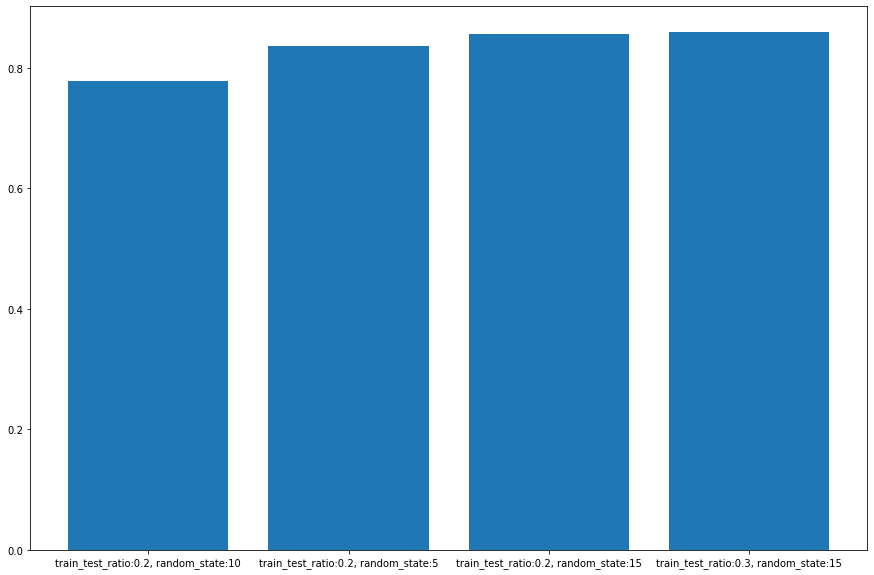

In [48]:
# Plot
plt.bar([x['title'] for x in accuracies],[x['accuracy'] for x in accuracies])
plt.show()

## Hence, a random state of 15 with 30% of data being used for testing gives the best score.

In [49]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.84014922, 0.78873287, 0.86373278, 0.86871995, 0.88094502])

# Finding the best model using GridSearchCV

In [50]:
algos = {
    'linear_regression' : {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion' : ['mse','friedman_mse'],
            'splitter': ['best','random']
        }
    }
}
scores = []
for algo_name, config in algos.items():
    gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X,y)
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })

pd.DataFrame(scores,columns=["model","best_score","best_params"])

,model,best_score,best_params
0,linear_regression,0.848456,{'normalize': False}
1,lasso,0.709007,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.754204,"{'criterion': 'mse', 'splitter': 'best'}"


# Based on above results, we can say that LinearRegression gives the best score. Hence we will use that.

In [51]:
X.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
def predict_price(location,sqft,bath,bhk):
    loc_index=X.columns.get_loc(location)
    x=np.zeros(len(X.columns))
    x[0:3] = [sqft,bath,bhk]
    
    if loc_index>=0:
        x[loc_index]=1
    return lr_model.predict([x])[0]

In [53]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

82.05136333656176

In [54]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

86.54190429839376

In [55]:
predict_price('Indira Nagar',1000, 2, 2)

178.41488694991654

In [56]:
predict_price('Indira Nagar',1000, 3, 3)

182.90542791174852

# Exporting the trained model to a pickle file

In [57]:
import pickle
with open('trained_model.pickle','wb') as f:
    pickle.dump(lr_model,f)